In [28]:
import networkx as nx
import freeman as fm
import matplotlib.pyplot as plt
from pprint import pprint
import pymysql
import sys
from collections import defaultdict, OrderedDict
import graph_tool as gt
from graph_tool import centrality, draw
import pandas as pd
import statsmodels.api as sm
import statsmodels
import math

import pickle

from setup import mysql_setup

# Decada 60

In [2]:

with open("listas.pickle", "rb") as fp:
    list_60, list_70, list_80, list_90, list_00, list_10 = pickle.load(fp)
with open("infos.pickle", "rb") as fp:
    d = pickle.load(fp)
with open("infos2.pickle", "rb") as fp:
    d_60, d_70, d_80, d_90, d_00 = pickle.load(fp)
with open("d_60_1_listas.pickle", "rb") as fp:
    lista_l, lista_p, lista_d, lista_b, lista_c = pickle.load(fp)

In [24]:
for i in range(len(lista_c)):
    if math.isnan(lista_c[i]):
        lista_c[i] = 0

## Popularity x Degree

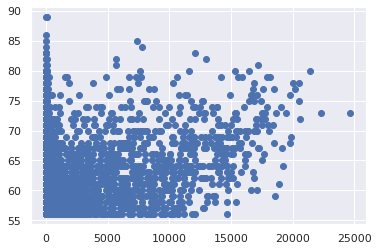

In [41]:
plt.scatter(lista_d, lista_p)
plt.show()

In [33]:
model_d = sm.OLS(lista_p, lista_d)
results_d = model_d.fit()
print(results_d.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.357
Model:                            OLS   Adj. R-squared (uncentered):              0.357
Method:                 Least Squares   F-statistic:                              1366.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                   3.61e-238
Time:                        14:18:02   Log-Likelihood:                         -13152.
No. Observations:                2461   AIC:                                  2.631e+04
Df Residuals:                    2460   BIC:                                  2.631e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Popularity x Betweenness

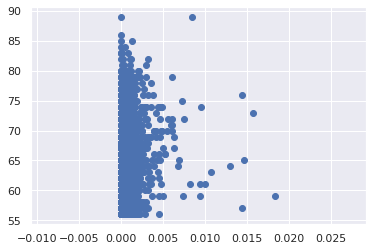

In [42]:
plt.scatter(lista_b, lista_p)
plt.show()

In [45]:
model_b = sm.OLS(lista_p, lista_b)
results_b = model_b.fit()
print(results_b.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.225
Model:                            OLS   Adj. R-squared (uncentered):              0.225
Method:                 Least Squares   F-statistic:                              716.2
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                   1.08e-138
Time:                        14:43:04   Log-Likelihood:                         -13380.
No. Observations:                2461   AIC:                                  2.676e+04
Df Residuals:                    2460   BIC:                                  2.677e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/liu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



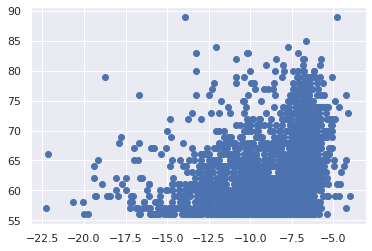

In [46]:
lista_b_log = np.log(lista_b)
lista_del = [0]
for i in range(len(lista_b_log)):
    if math.isnan(lista_b_log[i]) or math.isinf(lista_b_log[i]) :
        lista_del.append(i)
        
for j in reversed(lista_del):
    lista_b_log = np.delete(lista_b_log, j)
    lista_p = np.delete(lista_p, j)

plt.scatter(lista_b_log, lista_p)
plt.show()

In [47]:
model_b = sm.OLS(lista_p, lista_b_log)
results_b = model_b.fit()
print(results_b.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                          1.905e+04
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                        0.00
Time:                        15:33:29   Log-Likelihood:                         -9849.0
No. Observations:                2221   AIC:                                  1.970e+04
Df Residuals:                    2220   BIC:                                  1.971e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Popularity x Closeness

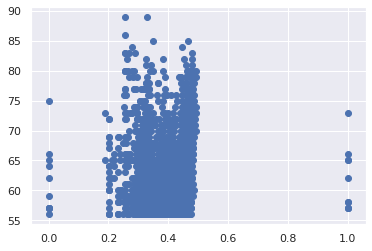

In [43]:
plt.scatter(lista_c, lista_p)
plt.show()

In [44]:
model_c = sm.OLS(lista_p, lista_c)
results_c = model_c.fit()
print(results_c.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          5.065e+04
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                        0.00
Time:                        14:43:00   Log-Likelihood:                         -9914.4
No. Observations:                2461   AIC:                                  1.983e+04
Df Residuals:                    2460   BIC:                                  1.984e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------